# <font color="blue">Project1: Virtual Makeup </font>
We have already seen interesting applications of facial features and landmarks such as aging, beardify, face swap etc.

In this project, you will build features for a Virtual Makeup application! Given below are a few features that are required to be built in the application. 

1. Apply Lipstick
1. Apply Blush
1. Apply Eye-Liners or Eye-Lashes
1. Apply Glasses
1. Apply Eye Color ( Lens Color)
1. Apply Hat/Cap
1. Apply Ear-Rings
1. Change Hair Color

### <font color="green">Your Task</font>
Implement any 2 features from the list above

We have provided a sample image. You can use your own image for experimentation as well as come up with other interesting features.

### <font color="green">Submission</font>
Once you are done, you have to either make a video or submit a writeup explaining the main part of the code. For video, upload it to youtube or any other video sharing service and provide the link in the form given below. For Text writeup, you can create a blog or write it in a doc file and submit.

### <font color="green">Marks Distribution</font>

1. Feature 1: 35 marks
2. Video/Writeup for Feature 1: 15 marks
3. Feature 2: 35 marks
4. Video/Writeup for Feature 2: 15 marks

In [5]:
import cv2,sys,dlib,time,math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load faceBlendCommon file to use common functions.

In [6]:
import sys
sys.path.append('../resource/lib/public')
import faceBlendCommon as fbc

In [7]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0,8.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

# <font color="blue">Load landmark detector</font>
We have provided code for loading the model for landmark detector.

In [8]:
# Landmark model location
PREDICTOR_PATH =  "../resource/lib/publicdata/models/shape_predictor_68_face_landmarks.dat"

# Get the face detector
faceDetector = dlib.get_frontal_face_detector()
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

# <font color="blue">Read Image</font>
We load the image and convert it to RGB format so that it can be used by Dlib and also for displaying using matplotlib.

### <font color="red">You can also use any other image.</font> 

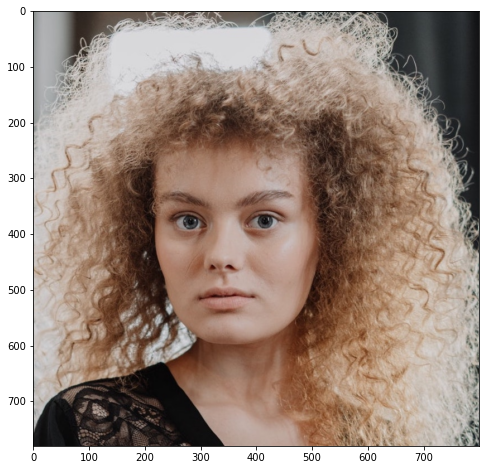

In [9]:
im = cv2.imread("../resource/lib/publicdata/images/girl-no-makeup.jpg")

imDlib = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(imDlib)

# <font color="blue">Calculate Landmarks</font>
We are providing code for calculating the landmarks in this section. So that you can focus on the feature implementation.

In [10]:
imagecopy=imDlib

points = fbc.getLandmarks(faceDetector, landmarkDetector, imagecopy)
print(points)

[(216, 375), (217, 411), (224, 446), (233, 480), (242, 515), (258, 547), (283, 574), (313, 594), (350, 600), (390, 595), (430, 579), (464, 557), (488, 524), (501, 487), (508, 447), (513, 408), (514, 369), (223, 343), (241, 326), (268, 325), (293, 333), (317, 346), (362, 345), (389, 331), (418, 321), (449, 321), (474, 336), (338, 374), (337, 397), (335, 419), (333, 442), (315, 465), (326, 468), (337, 471), (351, 468), (364, 465), (252, 378), (268, 368), (289, 369), (307, 385), (287, 390), (266, 389), (382, 384), (401, 369), (423, 367), (441, 375), (426, 387), (404, 389), (293, 517), (310, 503), (327, 496), (340, 500), (353, 496), (376, 502), (401, 514), (377, 528), (356, 535), (341, 536), (326, 535), (310, 530), (303, 516), (327, 512), (340, 512), (354, 511), (391, 513), (354, 512), (341, 513), (327, 513)]


# <font color="blue">TODO</font>
You have to implement 2 features from the above list. You can also think about a new feature and implement. 


# <font color="blue">Feature 1</font>
Write code for the first feature you want to implement from the above list. Display the output image after writing the code.

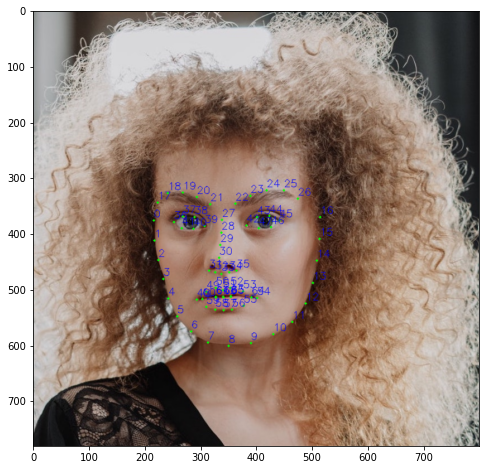

In [11]:
for i, point in enumerate (points):
    cv2.circle(imagecopy, point, 2, (0, 255, 0), thickness=-1)  # The color of the point is green
    cv2.putText(imagecopy, str(i), (point[0], point[1] - 6), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 1)
# Display the image
plt.imshow(imagecopy)



In [12]:
# Load the image
image = cv2.imread("../resource/lib/publicdata/images/girl-no-makeup.jpg")  

# Load the facial landmarks predictor
predictor = dlib.shape_predictor("../resource/lib/publicdata/models/shape_predictor_68_face_landmarks.dat")



# Initialize dlib's face detector
detector = dlib.get_frontal_face_detector()

# Detect the faces in the image
faces = detector(image,)
print(faces)

rectangles[[(198, 267) (508, 577)]]


In [13]:
for face in faces:
    # Get the landmarks
    shape = predictor(image, face)

    # Get the coordinates of the lips
    lips = []
    for i in range(48, 61):
        lips.append((shape.part(i).x, shape.part(i).y))

    # Create a mask for the lips
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, [np.array(lips)], (255, 255, 255))

    # Choose a color for the lipstick
    lipstick_color = (0,0, 255)  # BGR for red

In [14]:
print("Image shape: ", image.shape)
print("Mask shape: ", mask.shape)


Image shape:  (780, 799, 3)
Mask shape:  (780, 799, 3)


In [15]:
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
mask = cv2.convertScaleAbs(mask)


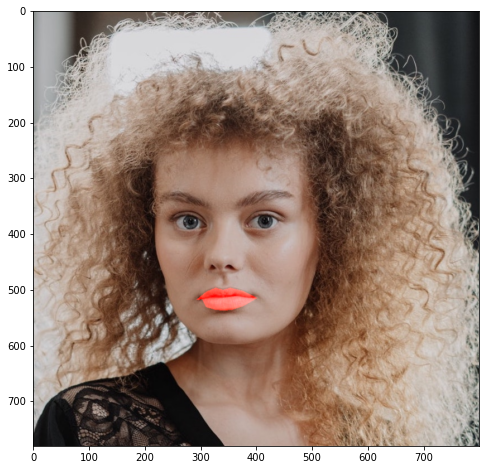

In [16]:
    # Apply the lipstick
    image_lipstick = cv2.bitwise_and(image, image, mask=mask)
    image_lipstick[mask != 0] = lipstick_color

    # Blend the original image with the lipstick image
    image = cv2.addWeighted(image,1.0, image_lipstick, 1.3, 0)

# Display the image

plt.imshow(image[:,:,::-1]);

# <font color="blue">Feature 2</font>
Write code for the second feature you want to implement from the above list. Display the output image after writing the code.

In [17]:
import cv2
import dlib
import numpy as np

# Load the pre-trained models for face and facial landmark detection
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("../resource/lib/publicdata/models/shape_predictor_68_face_landmarks.dat")

# Load the image of the glasses with alpha channel
glasses = cv2.imread('sunglass.png', cv2.IMREAD_UNCHANGED)


In [18]:
def get_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray)
    if len(rects) > 0:
        return predictor(gray, rects[0])
    return None


In [21]:
def overlay_glasses(image, glasses, landmarks):
    # Extracting the coordinates of the eyes
    left_eye = (landmarks.part(36).x, landmarks.part(36).y)
    right_eye = (landmarks.part(45).x, landmarks.part(45).y)

    # Calculate the width of the glasses based on the distance between the eyes
    eye_width = np.linalg.norm(np.array(right_eye) - np.array(left_eye))
    glasses_width = int(eye_width * 1.8)  # Scaling factor to adjust size of the glasses

    # Calculate the center between the eyes
    center_eye = ((left_eye[0] + right_eye[0]) // 2, (left_eye[1] + right_eye[1]) // 2)

    # Calculate the top-left corner of the glasses image
    top_left = (int(center_eye[0] - glasses_width // 2), int(center_eye[1] - glasses_width // 4))

    # Resize the glasses image to fit the face
    glasses_resized = cv2.resize(glasses, (glasses_width, int(glasses_width * glasses.shape[0] / glasses.shape[1])))

    # Split the glasses image into its color and alpha channels
    gw, gh, _ = glasses_resized.shape
    glasses_rgb = glasses_resized[:, :, :3]
    glasses_alpha = glasses_resized[:, :, 3] / 255.0

    for c in range(0, 3):
        image[top_left[1]:top_left[1] + gw, top_left[0]:top_left[0] + gh, c] = (
            glasses_rgb[:, :, c] * glasses_alpha +
            image[top_left[1]:top_left[1] + gw, top_left[0]:top_left[0] + gh, c] * (1.0 - glasses_alpha)
        )

    return image


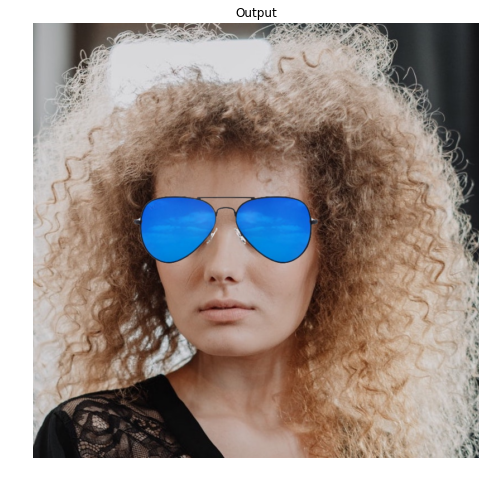

In [22]:
# Load the input image
image = cv2.imread("../resource/lib/publicdata/images/girl-no-makeup.jpg")

# Detect facial landmarks
landmarks = get_landmarks(image)

if landmarks:
    output_image = overlay_glasses(image, glasses, landmarks)
        
    # Convert the image from BGR to RGB format
    output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
        
    plt.imshow(output_image_rgb)
    plt.title('Output')
    plt.axis('off')  # Hide axes
    plt.show()
else:
    print("No face detected.")

